#    ***Cookie Cats Mobile Games: A/B Testing & Player Retention Analysis***

---



## **Table of Contents**



1.   [Project Background](https://colab.research.google.com/drive/1tAW2kG4qLAmLS2k9VZU-SYIt7FaxM6ui#scrollTo=1sPiRZrVg106&line=1&uniqifier=1)
2.   [About the Data](https://colab.research.google.com/drive/1tAW2kG4qLAmLS2k9VZU-SYIt7FaxM6ui#scrollTo=rWUKnhQoaeiY&line=1&uniqifier=1)
3.   [Analyzing Player Behavior](https://colab.research.google.com/drive/1tAW2kG4qLAmLS2k9VZU-SYIt7FaxM6ui#scrollTo=p-yRpuh6BbUS&line=3&uniqifier=1)
4.   [Comparing 1-day Retention](https://colab.research.google.com/drive/1tAW2kG4qLAmLS2k9VZU-SYIt7FaxM6ui#scrollTo=oCp96vJ7EU9L&line=5&uniqifier=1)
5.   [Comparing 7-day Retention](https://colab.research.google.com/drive/1tAW2kG4qLAmLS2k9VZU-SYIt7FaxM6ui#scrollTo=hDe8tymXN-bV&line=5&uniqifier=1)
6.   [Conclusion](https://colab.research.google.com/drive/1tAW2kG4qLAmLS2k9VZU-SYIt7FaxM6ui#scrollTo=lrI6EknWVM-g&line=1&uniqifier=1)
7.   [Recommendations](https://colab.research.google.com/drive/1tAW2kG4qLAmLS2k9VZU-SYIt7FaxM6ui#scrollTo=qqGYy3KnZy8O&line=5&uniqifier=1)





## Part 1. **Project Background**

[Cookie Cats](https://www.facebook.com/cookiecatsgame) is a hugely popular mobile puzzle game developed by [Tactile Entertainment](http://tactile.dk/). It's a classic "connect three"-style puzzle game where the player must connect tiles of the same color to clear the board and win the level. It also features singing cats. Check out this short demo:

<iframe width="560" height="315" src="https://youtu.be/GaP5f0jVTWE" frameborder="0" allow="accelerometer; autoplay; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>

As players progress through the levels of the game, they will **occasionally encounter gates that force them to wait a non-trivial amount of time or make an in-app purchase to progress**. In addition to driving in-app purchases, these gates serve the important purpose of giving players an enforced break from playing the game, hopefully resulting in that the player's enjoyment of the game being increased and prolonged.

But where should the gates be placed? Initially the first gate was placed at level 30. **In this project, we're going to analyze an AB-test where we moved the first gate in Cookie Cats from level 30 to level 40. In particular, we will look at the impact on player retention**.

![Gates in Cookie Cats](/content/cc_gates.png)



## Part 2. **About the Data**

### 2.1 **Load the AB-test data**


In [3]:
import pandas as pd

cookiee_df = pd.read_csv("/content/cookie_cats.csv")
cookiee_df.head()

,userid,version,sum_gamerounds,retention_1,retention_7
0,116,gate_30,3,False,False
1,337,gate_30,38,True,False
2,377,gate_40,165,True,False
3,483,gate_40,1,False,False
4,488,gate_40,179,True,True


The dataset contains information from 90,189 players who installed the game during the A/B test period. Here's a breakdown of the variables in the dataset:  

- **`userid`**: A unique identifier assigned to each player.  
- **`version`**: Indicates the group to which the player was assigned. Players in the control group encountered a gate at level 30 (`gate_30`), while those in the test group encountered a gate at level 40 (`gate_40`).  
- **`sum_gamerounds`**: The total number of game rounds a player completed during the first week after installation.  
- **`retention_1`**: A boolean value indicating whether the player returned to the game one day after installing it.  
- **`retention_7`**: A boolean value indicating whether the player returned to the game seven days after installing it.  

When players installed the game, they were randomly assigned to either the control group or the test group, ensuring an unbiased comparison of retention metrics based on gate placement.

### 2.2 **Checking for missing values**


In [4]:
cookiee_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90189 entries, 0 to 90188
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   userid          90189 non-null  int64 
 1   version         90189 non-null  object
 2   sum_gamerounds  90189 non-null  int64 
 3   retention_1     90189 non-null  bool  
 4   retention_7     90189 non-null  bool  
dtypes: bool(2), int64(2), object(1)
memory usage: 2.2+ MB


From the output, there's no missing value in the dataset.

### 2.3 **Counting the number of players in each group**



In [5]:
cookiee_df.groupby("version").count()

,userid,sum_gamerounds,retention_1,retention_7
version,,,,
gate_30,44700,44700,44700,44700
gate_40,45489,45489,45489,45489


The code groups the data by the version column and counts the number of entries for each variable. The output shows that 44,700 players were assigned to the control group (gate_30), and 45,489 players were assigned to the test group (gate_40). The distribution is nearly even between the two groups, which is great for a balanced A/B test!

## Part 3 **Analyzing Player Behaviour**

We will plot a boxplot to visualize the distribution of 'sum_gamerounds', which would give us a rough idea of how many game rounds were played by a player during the first week after installing the game.

<Axes: >

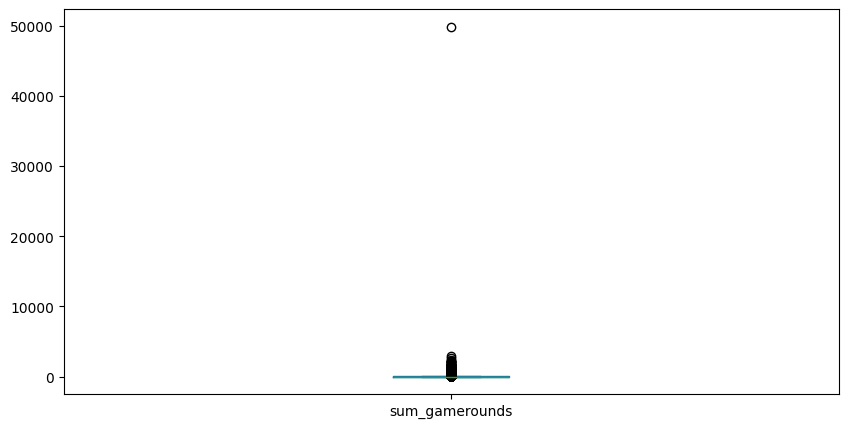

In [6]:
cookiee_df["sum_gamerounds"].plot.box(figsize=(10,5))

Clearly, there is an outlier. This player played about 50,000 game rounds during the first week! Due to this outlier, this boxplot is extremely skewed and not very informative. To learn about the behavior of the majority of the players, we will check the percentiles.

In [7]:
cookiee_df["sum_gamerounds"].describe()

,sum_gamerounds
count,90189.000000
mean,51.872457
std,195.050858
min,0.000000
25%,5.000000
50%,16.000000
75%,51.000000
max,49854.000000


In [9]:
# Counting the number of players for each number of gamerounds
plot_cookie = cookiee_df.groupby('sum_gamerounds')['userid'].count()
plot_cookie


,userid
sum_gamerounds,
0,3994
1,5538
2,4606
3,3958
4,3629
...,...
2294,1
2438,1
2640,1


As we can see, 50% of players played fewer than 16 game rounds during the first week after installation, and 75% of players played fewer than 51 rounds.

Nearly 4000 players did not even play a single round after installation. Possible reasons may include:

- They downloaded a number of new games at the same time and were attracted by other games.
- They opened the app but did not like the design/interface/music, so they quit even before playing the game.
- They have not started playing the game yet.
- ......

Another number worth attention is that more than 14,000 players played fewer than three rounds. For these players, the reasons for leaving may include:

- They did not enjoy the game. (This is probably the most common reason).
- The game turned out to be different from what they expected.
- The game was too easy and they got bored of it.
- ......

It is important to understand why a large number of players quit the game at an early stage. Tactile Entertainment can try to collect player feedback, for example, through an in-app survey.

Text(0.5, 0, '# Game rounds')

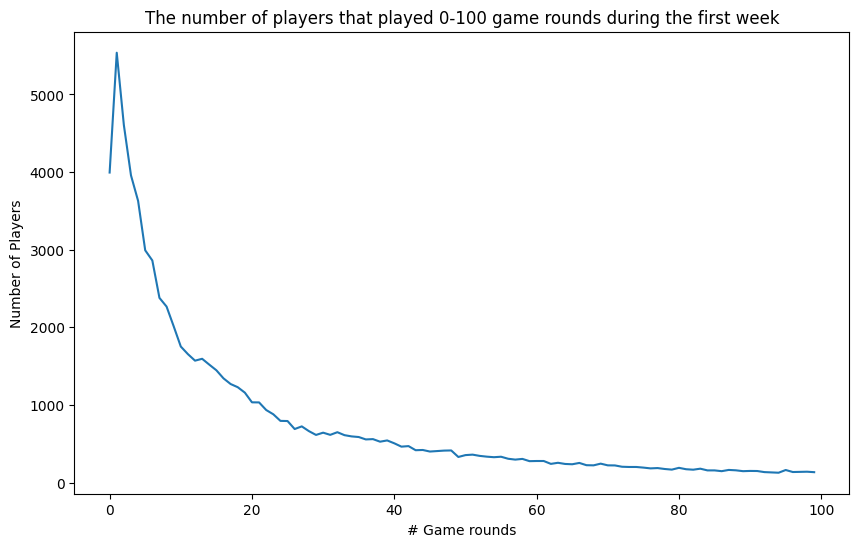

In [10]:
# Plot the distribution of players that played 0 to 100 game rounds during their first week playing the game.
%matplotlib inline

ax = plot_cookie[:100].plot(figsize=(10,6))
ax.set_title("The number of players that played 0-100 game rounds during the first week")
ax.set_ylabel("Number of Players")
ax.set_xlabel('# Game rounds')

The distribution is highly skewed, with a long tail on the right. A huge number of players played fewer than 20 rounds and left the game. For rounds greater than 60, the number of players stayed steady at about 300.

## Part 4 **Comparing 1-day Retention**

In the plot above we can see that some players install the game but then never play it, some players just play a couple of game rounds in their first week, and some get really hooked! What we want is for players to like the game and to get hooked.

A common metric in the video gaming industry for how fun and engaging a game is 1-day retention: the percentage of players that comes back and plays the game one day after they have installed it. The higher 1-day retention is, the easier it is to retain players and build a large player base.

### 4.1 **Overall 1-day retention**


In [11]:
cookiee_df['retention_1'].sum() / cookiee_df['retention_1'].count() # When using .sum(), T/F will first be converted to 1/0.

# Equivalent to df['retention_1'].mean()
# Mean is calculated by summing the values and dividing by the total number of values.

0.4452095044850259

A little less than half of the players come back one day after installing the game. Now that we have a benchmark, let's look at how 1-day retention differs between the two AB-groups.

### 4.2 **1-day retention for each AB-group**


In [12]:
cookiee_df.groupby('version')['retention_1'].mean()

,retention_1
version,
gate_30,0.448188
gate_40,0.442283


The code calculates the mean 1-day retention for each group. The results indicate that 1-day retention **slightly decreased when the gate was moved to level 40** (44.2%) compared to the control at level 30 (44.8%). While the difference is small, even minor changes in retention can significantly impact outcomes. However, to determine if this difference is meaningful or likely to persist, we need to assess the certainty of these retention numbers—one approach is bootstrapping, which we'll explore next. We will also explore Z-tests to compare the groups more formally.

### 4.3 **Bootstrapping: Should we be confident in the difference?**



<Axes: ylabel='Density'>

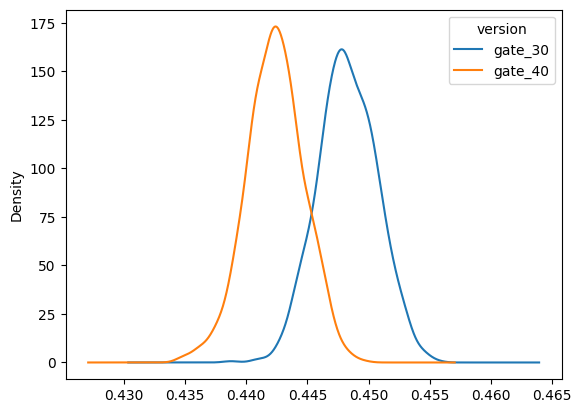

In [13]:
# Creating an list with bootstrapped means for each AB-group
boot_1d = []
for i in range(1000):
    boot_mean = cookiee_df.sample(frac = 1,replace = True).groupby('version')['retention_1'].mean()
    boot_1d.append(boot_mean)

# Transforming the list to a DataFrame
boot_1d = pd.DataFrame(boot_1d)

# A Kernel Density Estimate plot of the bootstrap distributions
boot_1d.plot(kind='density')

These two distributions above represent the bootstrap uncertainty over what the underlying 1-day retention could be for the two AB-groups. There seems to be some evidence of a difference, albeit small. Let's plot the % difference to have a closer look.

Probability that 1-day retention is greater when the gate is at level 30: 0.958


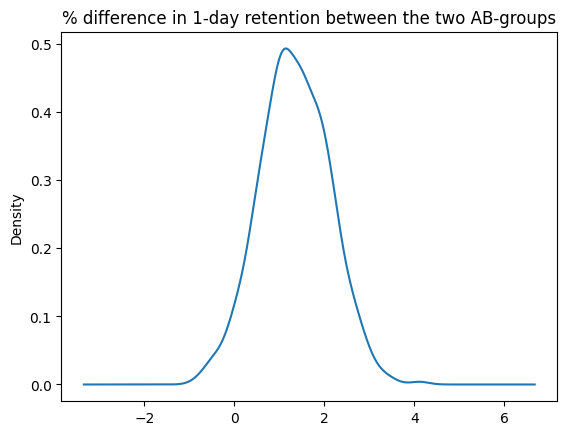

In [14]:
# Adding a column with the % difference between the two AB-groups
boot_1d['diff'] = (boot_1d.gate_30 - boot_1d.gate_40)/boot_1d.gate_40*100

# Ploting the bootstrap % difference
ax = boot_1d['diff'].plot(kind='density')
ax.set_title('% difference in 1-day retention between the two AB-groups')

# Calculating the probability that 1-day retention is greater when the gate is at level 30
print('Probability that 1-day retention is greater when the gate is at level 30:',(boot_1d['diff'] > 0).mean())

From this chart, we can see that the most likely % difference is around 1% - 2%, and that **96% of the distribution is above 0%, in favor of a gate at level 30**.

### 4.4   **Z-Test for Comparison**

To complement the bootstrapping analysis, we will conduct a Z-test to formally compare the means of 1-day retention between the two groups. The Z-test allows us to test the null hypothesis that there is no difference between the groups and determine if any observed difference is statistically significant.

In [15]:
import numpy as np
import scipy.stats as stats

# Extracting the retention values for each group
gate_30_retention = cookiee_df[cookiee_df['version'] == 'gate_30']['retention_1']
gate_40_retention = cookiee_df[cookiee_df['version'] == 'gate_40']['retention_1']

# Calculating means and standard deviations for both groups
mean_gate_30 = gate_30_retention.mean()
mean_gate_40 = gate_40_retention.mean()

std_gate_30 = gate_30_retention.std()
std_gate_40 = gate_40_retention.std()

# Calculating the sample sizes
n_gate_30 = len(gate_30_retention)
n_gate_40 = len(gate_40_retention)

# Z-test for independent samples
z_score = (mean_gate_30 - mean_gate_40) / np.sqrt((std_gate_30**2 / n_gate_30) + (std_gate_40**2 / n_gate_40))
p_value = 1 - stats.norm.cdf(z_score)  # one-tailed test

# Displaying the results
print("Z-score:", z_score)
print("P-value:", p_value)

# Interpretation of the result
if p_value < 0.05:
    print("There is a statistically significant difference between the two groups.")
else:
    print("There is no statistically significant difference between the two groups.")


Z-score: 1.7840774867039824
P-value: 0.037205537485016094
There is a statistically significant difference between the two groups.


The Z-score of 1.78 and a p-value of 0.037 indicate that there is a statistically significant difference between the two groups. Since the p-value is less than 0.05, we can **reject the null hypothesis and conclude that the difference in 1-day retention is likely real**.

## Part 5 **Comparing 7-day Retention**

The **bootstrap analysis** shows a high probability (96%) that 1-day retention is better when the gate is at level 30, which suggests that the gate at level 30 may initially offer a slight advantage. However, it’s important to consider that since players have only been playing for one day, many may not have reached level 30 yet. This means that, at this early stage, many players won’t have been impacted by the gate change.

However, as players progress in the game, the impact of the gate becomes more apparent. After having played for a week, more players should have reached level 40, the level where the test gate is implemented. Therefore, it makes sense to also consider **7-day retention** when evaluating the long-term effects of the gate at level 40. This would give us a clearer picture of whether the gate change impacts retention more meaningfully over time.

Additionally, the **Z-test** results showed a statistically significant difference between the two groups (with a p-value of 0.037), supporting the conclusion that there is a real difference in retention rates between players who experienced the gate at level 30 and those at level 40.



In [16]:
cookiee_df.groupby('version')['retention_7'].sum() / cookiee_df.groupby('version')['retention_7'].count()

,retention_7
version,
gate_30,0.190201
gate_40,0.182000


**Insights:**

- **Like with 1-day retention, 7-day retention is slightly lower when the gate is at level 40** (18.2%) than when the gate is at level 30 (19.0%).
- **This difference is also larger than for 1-day retention**, presumably because more players have had time to hit the first gate.
- **The overall 7-day retention is lower than the overall 1-day retention**; fewer people play a game a week after installing than a day after installing.

But as before, let's use bootstrap analysis to figure out how certain we should be of the difference between the AB-groups.

Probability that 7-day retention is greater when the gate is at level 30: 0.998


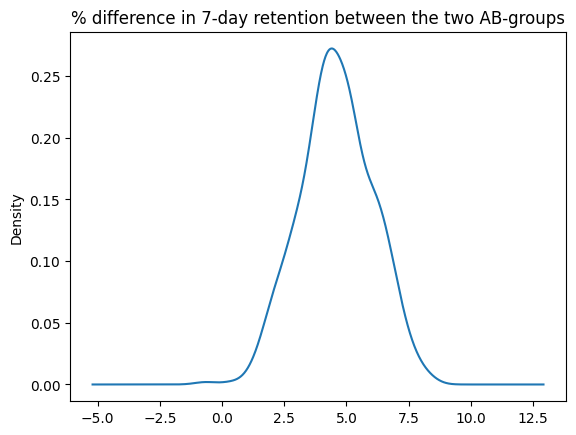

In [18]:
# Creating a list with bootstrapped means for each AB-group
boot_7d = []
for i in range(500):
    boot_mean = cookiee_df.sample(frac=1,replace=True).groupby('version')['retention_7'].mean()
    boot_7d.append(boot_mean)

# Transforming the list to a DataFrame
boot_7d = pd.DataFrame(boot_7d)

# Adding a column with the % difference between the two AB-groups
boot_7d['diff'] = (boot_7d.gate_30 - boot_7d.gate_40)/boot_7d.gate_40*100

# Ploting the bootstrap % difference
ax = boot_7d['diff'].plot(kind='density')
ax.set_title('% difference in 7-day retention between the two AB-groups')

# Calculating the probability that 7-day retention is greater when the gate is at level 30
print('Probability that 7-day retention is greater when the gate is at level 30:',(boot_7d['diff'] > 0).mean())

**Bootstrap Analysis:**

- We performed a bootstrap analysis to assess the uncertainty in the difference in 7-day retention between the two groups.
- The resulting probability that **7-day retention is greater when the gate is at level 30 is 99.8%**, indicating a very high likelihood that **players in the gate_30 group are more likely to return after 7 days than those in the gate_40 group**.

This complements the previous analysis, suggesting that 7-day retention also supports the conclusion that gate_30 performs slightly better, and the results are statistically significant.

## Part 6. **Conclusion**

The bootstrap analysis provides **strong evidence that 7-day retention is higher when the gate is at level 30 compared to level 40**. This suggests that if we aim to maintain high player retention — both in the short and long term — we should avoid moving the gate from level 30 to level 40.

Although other metrics like **game rounds played** or **in-game purchases** could also provide valuable insights, retention remains one of the most critical indicators. Without strong retention, no amount of in-game spending can sustain the game's success.

The observed higher retention at **level 30** can be explained by the **theory of hedonic adaptation**. In essence, players tend to get less enjoyment from an activity over time. By introducing a gate at level 30, we provide a natural pause that prolongs enjoyment and engagement. However, with the gate at level 40, fewer players reach that point, potentially leading to boredom and a higher chance of quitting the game.

## Part 7. **Recommendations**

- **Keep the gate at level 30** to maximize both **1-day** and **7-day retention**.
- **Test other possible adjustments** in gameplay mechanics or incentives to boost engagement without delaying access to the first gate.
- **Consider adding new features** to maintain player interest and counteract hedonic adaptation as the game progresses, keeping players engaged in the long run.